In [1]:
#stats model and visualization imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
#custom Imports
import Wrangle as w
from scipy import stats
import explore as e
import Modeling as m 

## Project Plan:
- Acquire:
    - I will acquire data through functions saved in my wrangle.py along with my encrypted credentials.
- Prepare:
    - Prepare and clean my data in such a way that I can plug it in to my classification models without causing error and with the prepared data still holding       true to its original meaning. This includes:
        - dropping all rows with nulls for the column metacritic as this is where I am deriving my target.
        - encoding all categorical variables.
        - scaling my numeric variables to numbers between 0 and 1.
        - dropping unnecessary columns. Many Included in the dataset would have information that I would not be privy to upon a games release.
        - dropping all remaining nulls as this is only about 100 more rows.
- Explore:
    - Ask statistical questions of my data to find useful insights and create visualizations of the results in order to improve comprehension by people reading       the report without clarifications from my presentation.
- Modeling:
    - Define a baseline.
    - Create models and adjust parameters to try to accurately predict the 'good game' status of a game, Validate that all of your models are accurate not just       on your train data but on outside data as well.
- Deliver:
    - Put all of my findings together in a final report where I make things as easy to understand as possible.

        

    

## Project Summary:
- In my project I am looking at a videogame dataset and am trying to create a model that will take in features from the data that it will use to predict whether or not a game is considered a 'must play game'. This classification comes from metacritic.com where they define a 'must play game' as a game that achieves a metacritic score of above 90%, which is created by taking weighted averages of all of the reviews of games based upon the 'quality' and 'stature' of the critic. In my work I was able to create 3 models That all performed similarly well and above the baseline. I found 4 useful drivers of what could cause a game to be or not be a 'must play game'. My Decision Tree Classifier was my best model testing at 98.7% accurate at predicting if a game will or won't be a 'must play game', with a precision rate of 100% on finding 'must play games'. My main take-aways from my report would be that games published by Blizzard and games that fall under the shooter genre are both significantly more likely to be 'must play games' compared to the general population. some other take-aways are that I have created a model that is 2.5% more accurate than the baseline and I have identified some very relevant features which we can manipulate going forward to try and detect 'must play games'.

##### My target = MUST PLAY GAME - a game achieving a score of over 90% on metacritic

## Acquire:

In [2]:
#calling get games function which reads local csv and imports as df.
df = w.get_games()

## Prepare:

In [3]:
#calling prep_data which cleans imported df as explained in plan.
df = w.prep_data(df)

In [4]:
#calling split games which splits my df into train,validate,test,x_train,y_train,x_validate,y_validate,x_test,y_test.
train, validate, test, x_train,y_train, x_validate,y_validate, x_test, y_test = w.split_games(df)

## Exploration:

In [5]:
alpha = .05

Distribution of good games.

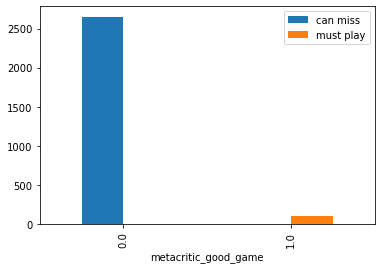

In [6]:
#simple barchart to show distribution of good and bad games.
pd.crosstab(y_train,y_train).plot.bar()
plt.legend(['can miss','must play'])



## Question 1:

Are PC games equally likely to be 'must play games' as the general population of platforms?
- Hnull - PC games are equally likely to be good games as the general population
- Halt - PC games are not equally likely to be good games compared to the population.

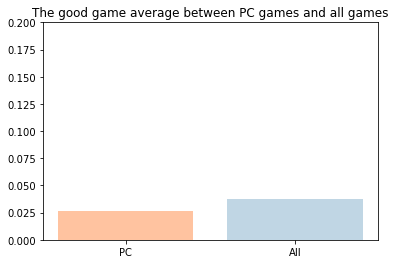

In [7]:
#calling the get_pc_viz function to create a visual for this test.
e.get_PC_viz(train)

In [8]:
#calling the chi^2 function in order to run a chi_square test on PC games vs all platforms and whether they are good games.
e.chi_square(train,'Platform_PC')

The p-value is less than the alpha: True


Since my p-val is less than alpha than I can reject the null hypothesis that the likelyhood for a good game to be released on PC  is the same as all platforms. Therefor this feature could be useful to our model.

## Question 2:

Are shooters equally likely to be 'must play games' as the general population of genres?
- Hnull - shooters are equally likely to be 'must play games' as other genres
- Halt - shooters are not equally likely to be 'must play games' as other genres

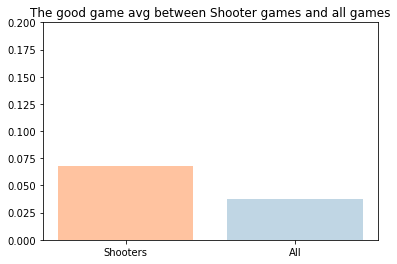

In [9]:
e.get_shooter_viz(train)

In [10]:
#Here I am running a Chi^2 on shooters vs all Genres and whether or not they are good games.
e.chi_square(train,'Genre_Shooter')

The p-value is less than the alpha: True


Since My p-val is  less than alpha I can conclude that the likelyhood of shooters being a good game is the more than the population therefor this probably is useful for my model.

## Question 3:

Are games published by blizzard equally likely to be 'must play games' as the general population of developers?
 - Hnull- blizzard games are equally likely to be 'must play games' as other developers
 - Halt- blizzard games are not equally likely to be 'must play games' as other developers


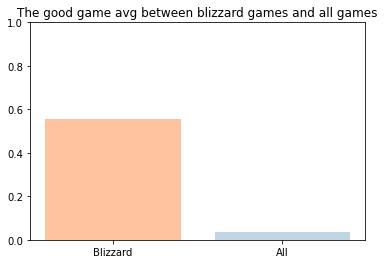

In [11]:
e.get_blizzard_viz(train)

In [12]:
#Here I am running a Chi^2 on blizzard games vs all publishers and whether or not they are good games.
e.chi_square(train,'Publisher_Blizzard_Entertainment')

The p-value is less than the alpha: True


Since the P-val is less than alpha I can conclude that blizzard games are more likely to be good games as other developers and this might be a good feature for modeling.


## Question 4:

Are Indie-Games equally likely to be 'must play games' than the general population of genres?
- Hnull - Indie-Games are equally likely to be 'must play games' as other genres
- Halt - Indie-Games are not equally likely to be 'must play games' as other genres

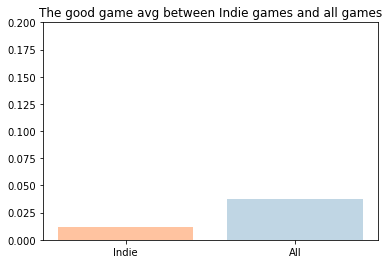

In [13]:
e.get_indie_viz(train)

In [14]:
#Here I am running a tchi^2 on indie games vs all genres and whether or not they are good games.
e.chi_square(train,'Genre_Indie')


The p-value is less than the alpha: True


Since the p-val is less than alpha I can conclude that the avg occurance of good games is lower in indie games than in All genres. This could be useful for my modeling.

## Question 5:

Are RPG games equally likely to be 'must play games' than the general population of genres?
- Hnull - RPG-Games are equally likely to be 'must play games' as other genres
- Halt - RPG-Games are not equally likely to be 'must play games' as other genres

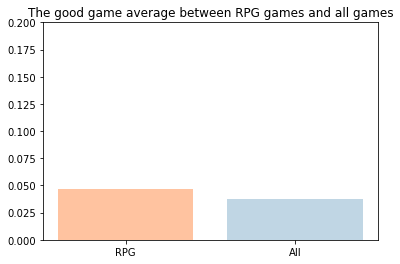

In [15]:
e.get_RPG_viz(train)

In [16]:
#Here I am running a tchi^2 on indie games vs all genres and whether or not they are good games.
e.chi_square(train,'Genre_RPG')

The p-value is less than the alpha: False


Since the p-val is less than alpha a game being an rpg would not be very useful to predicting 'must play' status.

## Modeling:

- Decision Tree Classifier
- Random Forest
- Logistic Regression

In [17]:
#Here I am scaling my data for modeling.
w.Scale_data(x_train,x_validate,x_test)

In [18]:
#Here I am calculating our baseline accuracy
m.get_baseline(train)

96.26

##### Decision Tree: 100% on validate

In [19]:
#Here I am creating fitting and scoring my Decision Tree Model on validate data. Hypers: max_depth = 5
print(m.get_DTC(x_train,y_train,x_validate,y_validate,5))

             0.0   1.0  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    884.0  35.0       1.0      919.0         919.0
None


##### Random Forest: 99% on validate

In [20]:
#Here I am creating fitting and scoring my Random Forest Model on Validate data. Hypers: max_depth = 18, min sample leaf = 4

print(m.get_RF(x_train,y_train,x_validate,y_validate,18,4))


                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.993258   1.000000  0.993471    0.996629      0.993515
recall       1.000000   0.828571  0.993471    0.914286      0.993471
f1-score     0.996618   0.906250  0.993471    0.951434      0.993176
support    884.000000  35.000000  0.993471  919.000000    919.000000
None


##### Logistic Regression: 96% on validate

In [21]:
#Here I am creating fitting and scoring my Logistic Regression Model on Validate data. Hypers: C = .4

print(m.get_LOGREG(x_train,y_train,x_validate,y_validate,.4))

                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.965066   1.000000   0.96518    0.982533      0.966396
recall       1.000000   0.085714   0.96518    0.542857      0.965180
f1-score     0.982222   0.157895   0.96518    0.570058      0.950828
support    884.000000  35.000000   0.96518  919.000000    919.000000
None


## TEST:

I have chosen my random forest model as it performs perfectly on my validate data.

In [22]:
#Here I am scoring my best model on test data.
m.test_DTC(x_train,y_train,x_test,y_test,5)

                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.986622   1.000000  0.986942    0.993311      0.987117
recall       1.000000   0.647059  0.986942    0.823529      0.986942
f1-score     0.993266   0.785714  0.986942    0.889490      0.985587
support    885.000000  34.000000  0.986942  919.000000    919.000000


As you can see my best model is testing at almost 99% accuracy (about 2.5% above baseline) with a precision score of 100% on my positive case which is great news! This means that every game my model defined as a 'must play game' was actually a 'must play game'.

## Conclusion:

In conclusion I was able to find 4 helpful features to focus on in the name of predicting what will make a game a 'must play game' or not, as well as make a model that tested at 98.7% accurate with 100% precision on my target of 'must play games'. I will continue to spend some time looking into ways to capture the 'must play games' that my model is missing. I will also spend more time in exploration as that could help me find Which of my features are more directly responsible for what causes a game to be 'must play'.

## Business Reccommendations:

Based off of my exploration I would recommend considering different genres and publishers when determining whether or not a game will be good or bad. particulary games published by Blizzard entertainment and games that are in the shooter genre. Some insights on what not to expect less in a must play game would be if it fell into the indie genre or is released on PC.